In [1]:
import nltk
import re,string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('wordnet')

from num2words import num2words

from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer

import pandas as pd
import os



[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/christinamarie/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/christinamarie/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

from collections import Counter

import numpy as np

In [3]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import random

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import MDS
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, KFold

In [5]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [6]:
from gensim.models import Word2Vec,LdaMulticore, TfidfModel
from gensim import corpora
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

/Users/christinamarie/opt/anaconda3/lib/python3.8/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [7]:
df3 = pd.read_csv ('Tweepy_df3.csv', index_col=False)
df3

Unnamed: 0               id_str  \
0             0  1388644402512474117   
1             1  1388644402495643649   
2             2  1388644402487201793   
3             3  1388644402487193605   
4             4  1388644402428579841   
..          ...                  ...   
495         495  1388644380416909313   
496         496  1388644380404240389   
497         497  1388644380379131907   
498         498  1388644380332883970   
499         499  1388644380186083330   

                                                  text    screen_name  \
0    @mider_teacup I bet he has more victims too, t...      lakota126   
1    RT @Eagles: That’s a wrap on the 2021 #EaglesD...      HoopFan29   
2    RT @KoreanUpdates: Around US confirms #Highlig...         Ongpai   
3    RT @sacred_ribbon: Every single Zhang Zhehan’s...      Pladolly3   
4    @serene4uk @ellufc @JimenaJuani But isn’t it g...    Lee_Adorned   
..                                                 ...            ...   
495  @justindeanlee There are quite a lot of people...   MartinSkold2   
496  RT @DeadPresPicks: VIP 1/1 \n\nMLB ⚾️⚾️\n\nWhi...    AkivaForman   
497  at my first soccer game since before the pande...  whythedilEMMA   
498  RT @thecaravanindia: Archives | The evasion in...       sayk_art   
499  RT @sunsandships: TIL the oldest living terres...   catherinjoyb   

    location country           created_at first_hashtag  
0        NaN     NaN  2021-05-01 23:59:59           NaN  
1        NaN     NaN  2021-05-01 23:59:59   EaglesDraft  
2        NaN     NaN  2021-05-01 23:59:59     Highlight  
3        NaN     NaN  2021-05-01 23:59:59           NaN  
4        NaN     NaN  2021-05-01 23:59:59           NaN  
..       ...     ...                  ...           ...  
495      NaN     NaN  2021-05-01 23:59:54           NaN  
496      NaN     NaN  2021-05-01 23:59:54           NaN  
497      NaN     NaN  2021-05-01 23:59:54           NaN  
498      NaN     NaN  2021-05-01 23:59:54           NaN  
499      NaN     NaN  2021-05-01 23:59:54           NaN  

[500 rows x 8 columns]

In [8]:
text1 = ' '.join(list(df3['text']))

    
print(text1)

@mider_teacup I bet he has more victims too, this man is a danger to the public RT @Eagles: That’s a wrap on the 2021 #EaglesDraft!

@LifeBrand_AI | #FlyEaglesFly https://t.co/Nxzpk5TVb5 RT @KoreanUpdates: Around US confirms #Highlight #Doojoon will be leading new drama 'No Goo Pil Soo' as a genius in his 20s, Jung Seok. He… RT @sacred_ribbon: Every single Zhang Zhehan’s character always have one big gay moment no matter how straight the character should be..

E… @serene4uk @ellufc @JimenaJuani But isn’t it great just to have a top 3 after nearly as many years of Bielsa in cha… https://t.co/mEOnOgINwT RT @pqpolitics: Viktor Bout, a Russian arms dealer once known as “the merchant of death,” had nearly a dozen #Delaware shell companies.

Ti… RT @AndyKimNJ: READ: There are a lot of good books and people should recommend others. One that is really informative about Asian American… RT @SpeakerPelosi: The most important thing is our children, our children, our children. The American Families

In [9]:
text1 = text1.lower()
text1 = text1.split()
text1 = [x for x in text1 if x[0] != '@']
text1 = ' '.join(text1)

tokenizer = nltk.RegexpTokenizer(r"\w+")
text1 = tokenizer.tokenize(text1)

fdist1 = nltk.FreqDist(text1)
print (fdist1.most_common(100))

[('the', 543), ('a', 466), ('rt', 314), ('to', 242), ('t', 233), ('of', 198), ('i', 192), ('co', 172), ('https', 170), ('in', 164), ('is', 154), ('and', 151), ('you', 121), ('for', 115), ('s', 110), ('it', 91), ('on', 79), ('this', 78), ('that', 75), ('we', 70), ('with', 66), ('are', 55), ('have', 52), ('was', 52), ('who', 49), ('my', 44), ('he', 43), ('at', 43), ('be', 42), ('as', 39), ('me', 39), ('will', 38), ('so', 38), ('one', 36), ('they', 36), ('not', 36), ('but', 35), ('like', 35), ('there', 34), ('if', 34), ('from', 34), ('by', 33), ('just', 32), ('can', 31), ('m', 29), ('an', 28), ('all', 28), ('out', 27), ('has', 26), ('day', 26), ('would', 26), ('amp', 26), ('about', 25), ('what', 24), ('up', 24), ('or', 24), ('his', 23), ('people', 23), ('our', 23), ('very', 23), ('been', 23), ('no', 22), ('had', 22), ('your', 22), ('she', 22), ('their', 20), ('don', 20), ('us', 19), ('over', 19), ('today', 19), ('when', 19), ('how', 18), ('think', 18), ('make', 18), ('get', 18), ('new', 1

In [10]:

wnl = WordNetLemmatizer()

lemma_words1 = []
for i in text1:
    j = wnl.lemmatize(i, pos = 'v')
    lemma_words1.append(j)
#print(lemma_words)


def get_num(x):
    try:
        return num2words(int(x))
    except:
        return x
text1 = [get_num(x) for x in lemma_words1]
#print(num_words[0:100])

text1 = [word for word in text1 if word not in stopwords.words('english')]
text1 = [word for word in text1 if word.isalpha()]
text1 = [word for word in text1 if word not in ["the", "get", "say", "use", "may","like"\
                                                "also", "would", "could", "rt", "https",\
                                                "zkzkzkxk", "thing", "things"] ]
text1 = [word for word in text1 if len(word) > 3]
fdist1 = nltk.FreqDist(text1)

#Get 100 Most Common Words
print (fdist1.most_common(150))

[('like', 37), ('make', 36), ('think', 28), ('know', 24), ('people', 23), ('come', 20), ('love', 19), ('today', 19), ('take', 18), ('world', 16), ('look', 16), ('always', 15), ('great', 15), ('show', 15), ('find', 15), ('live', 15), ('years', 14), ('much', 14), ('give', 14), ('work', 14), ('want', 14), ('three', 13), ('good', 13), ('year', 13), ('time', 13), ('call', 12), ('even', 12), ('game', 12), ('every', 11), ('need', 11), ('tell', 11), ('still', 11), ('support', 10), ('biden', 10), ('state', 10), ('book', 9), ('really', 9), ('best', 9), ('happy', 9), ('life', 9), ('last', 9), ('zero', 9), ('around', 8), ('many', 8), ('help', 8), ('leave', 8), ('pandemic', 8), ('long', 8), ('heart', 8), ('next', 8), ('away', 8), ('first', 8), ('vote', 8), ('keep', 8), ('hope', 8), ('play', 8), ('talk', 8), ('never', 8), ('read', 7), ('birthday', 7), ('wish', 7), ('person', 7), ('better', 7), ('feel', 7), ('thank', 7), ('hear', 7), ('back', 7), ('four', 7), ('name', 7), ('week', 7), ('former', 7), 

In [ ]:
x = 0
for i in text1:
    if i == 'think':
        x += 1
print(x)

In [ ]:
pd.set_option('display.max_colwidth', None)
df3[df3.text.str.contains('think')]

In [13]:
#function to test if something is a noun and only keep nouns
is_noun = lambda pos: pos[:2] == 'NN'

text1 = [word for (word, pos) in nltk.pos_tag(text1) if is_noun(pos)] 

#print(text1)
fdist1 = nltk.FreqDist(text1)
print (fdist1.most_common(100))

[('people', 23), ('today', 19), ('world', 16), ('years', 14), ('year', 13), ('time', 13), ('love', 12), ('game', 12), ('work', 12), ('support', 10), ('state', 10), ('book', 9), ('call', 9), ('life', 9), ('heart', 8), ('vote', 8), ('person', 7), ('look', 7), ('talk', 7), ('name', 7), ('week', 7), ('team', 7), ('month', 7), ('show', 6), ('music', 6), ('deal', 6), ('someone', 6), ('night', 6), ('country', 6), ('tell', 6), ('video', 6), ('anyone', 6), ('race', 6), ('community', 6), ('media', 6), ('character', 5), ('company', 5), ('news', 5), ('birthday', 5), ('group', 5), ('part', 5), ('vaccine', 5), ('watch', 5), ('offer', 5), ('break', 5), ('face', 5), ('place', 5), ('stream', 5), ('zero', 5), ('report', 5), ('police', 5), ('months', 5), ('bill', 5), ('woman', 5), ('join', 5), ('chance', 5), ('pass', 5), ('please', 5), ('drive', 5), ('picture', 5), ('moment', 4), ('matter', 4), ('others', 4), ('help', 4), ('party', 4), ('think', 4), ('series', 4), ('covid', 4), ('player', 4), ('sign', 4)

(-0.5, 1599.5, 1303.5, -0.5)

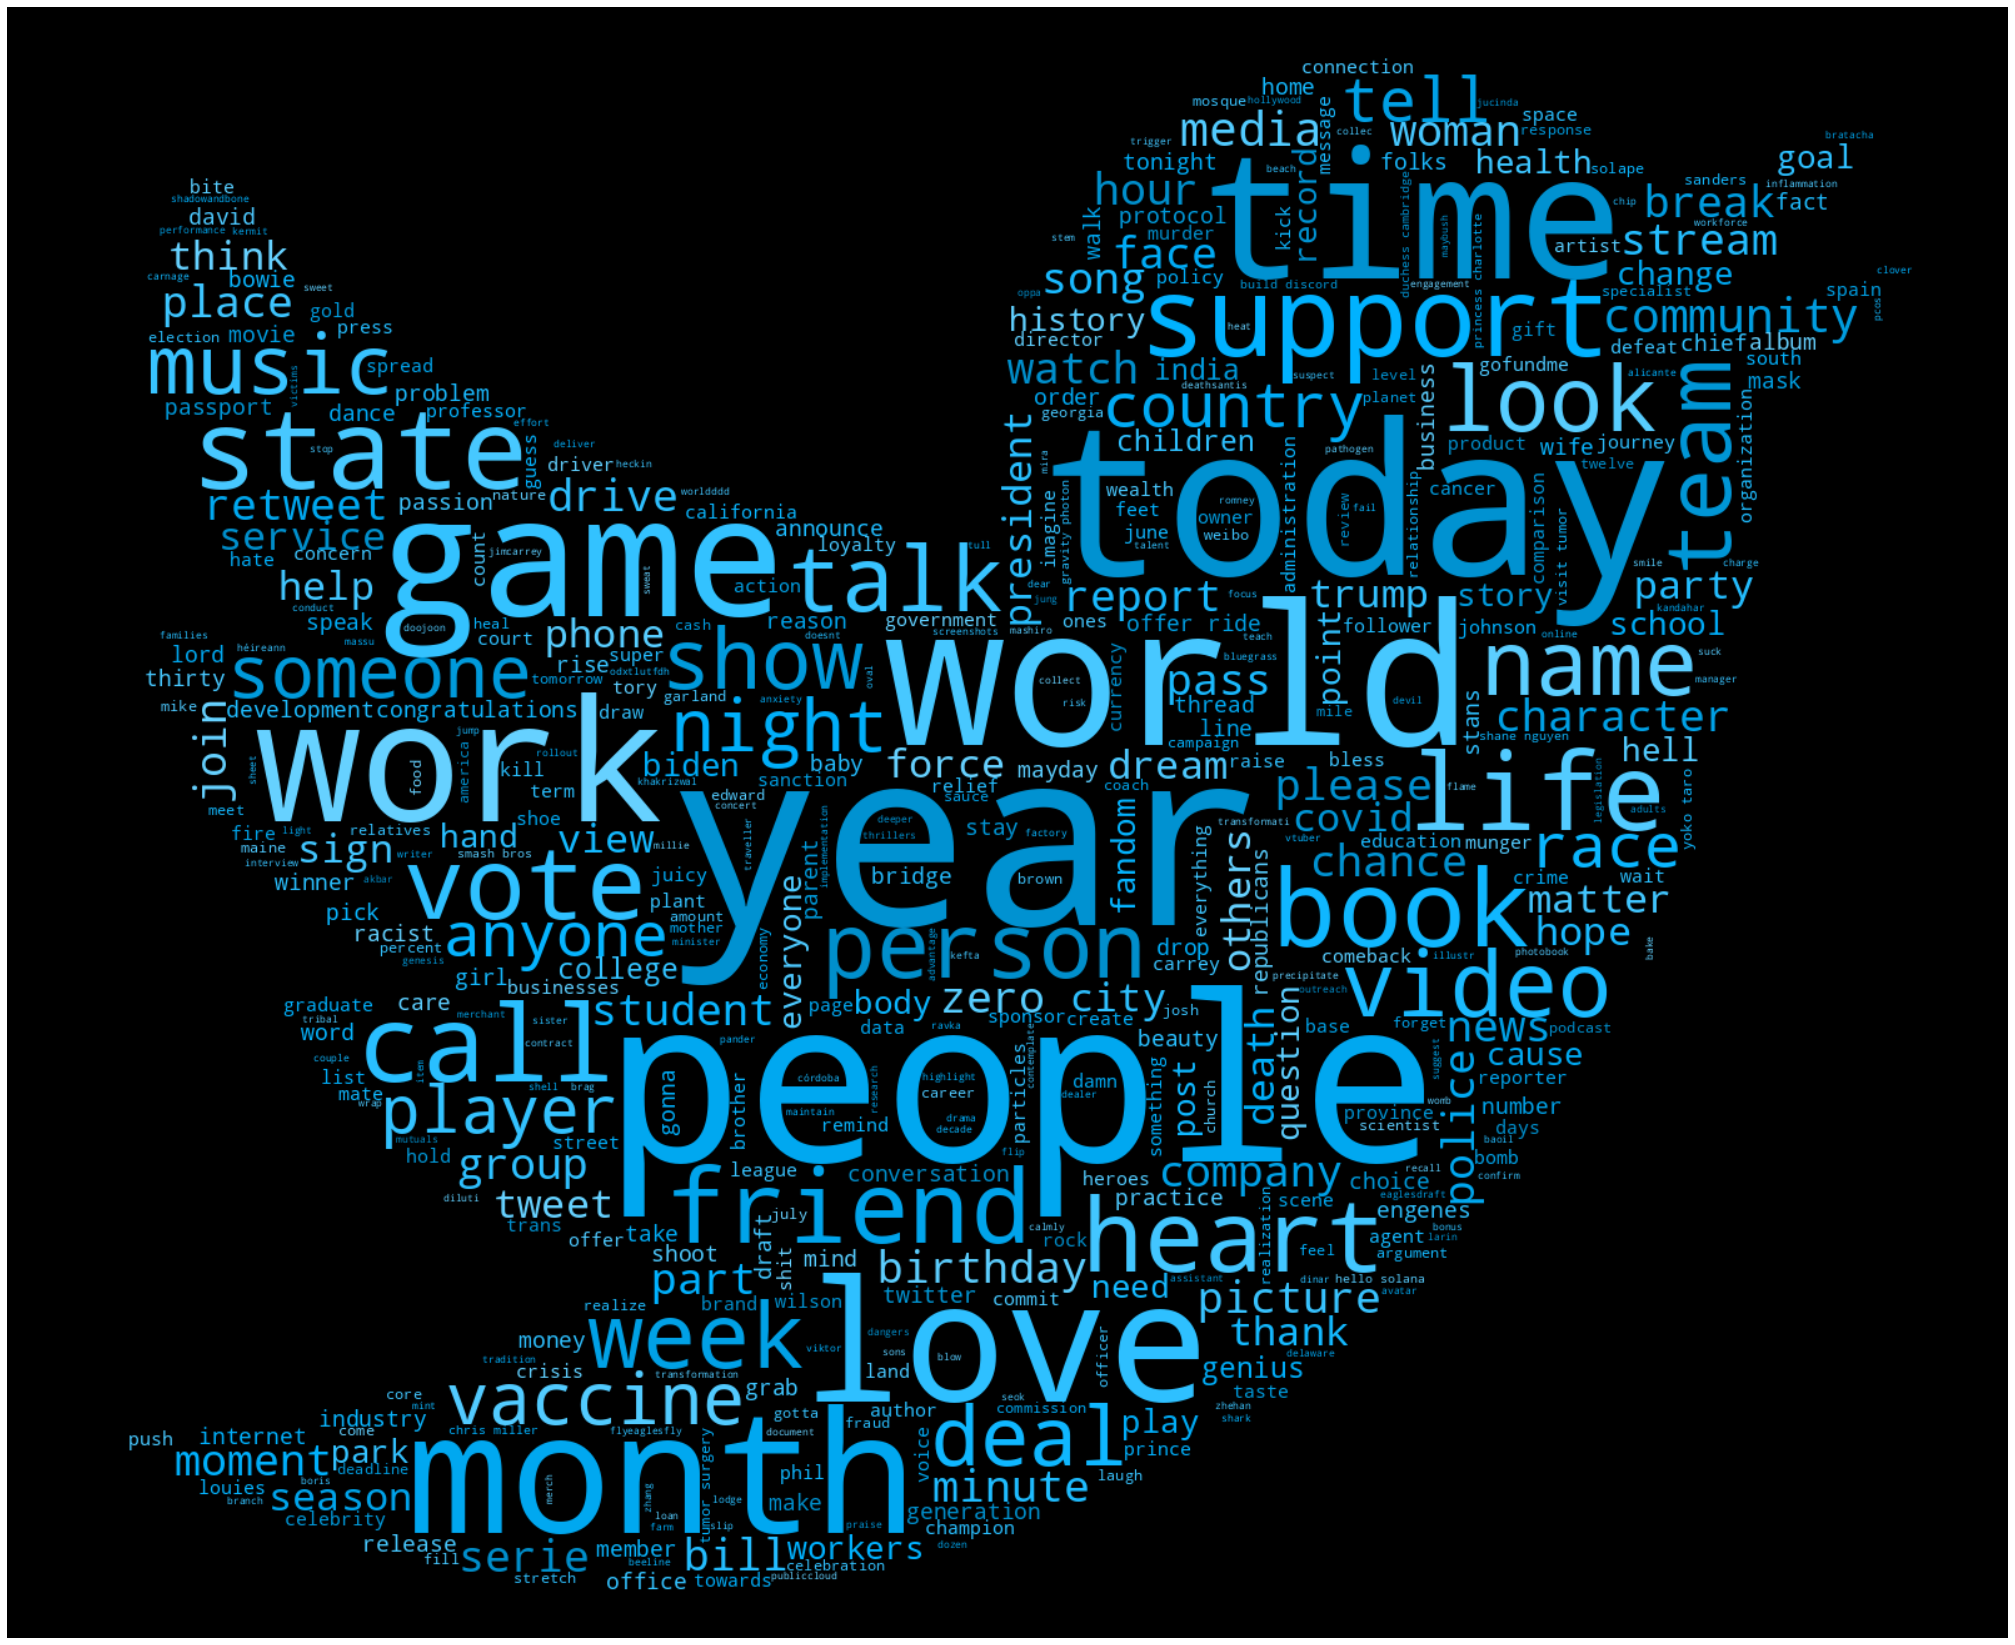

In [14]:
cloudtext1 = ' '.join(text1)

#def grey_color_func(word, font_size, position, orientation, random_state=None,
#                    **kwargs):
#    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)

def blue_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(198, 100%%, %d%%)" % random.randint(40, 70)

#wordcloud = WordCloud().generate(text)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()
mask = np.array(Image.open(path.join(d, "Twitter-symbol.jpg")))
wordcloud1 = WordCloud(max_font_size=200, max_words=500, mask=mask, background_color="Black").generate(cloudtext1)




# Display the generated image:
#plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(figsize=(40,30))
plt.imshow(wordcloud1.recolor(color_func=blue_color_func, random_state=3),
           interpolation="bilinear")
plt.axis("off")
#plt.show()

(-0.5, 1599.5, 1303.5, -0.5)

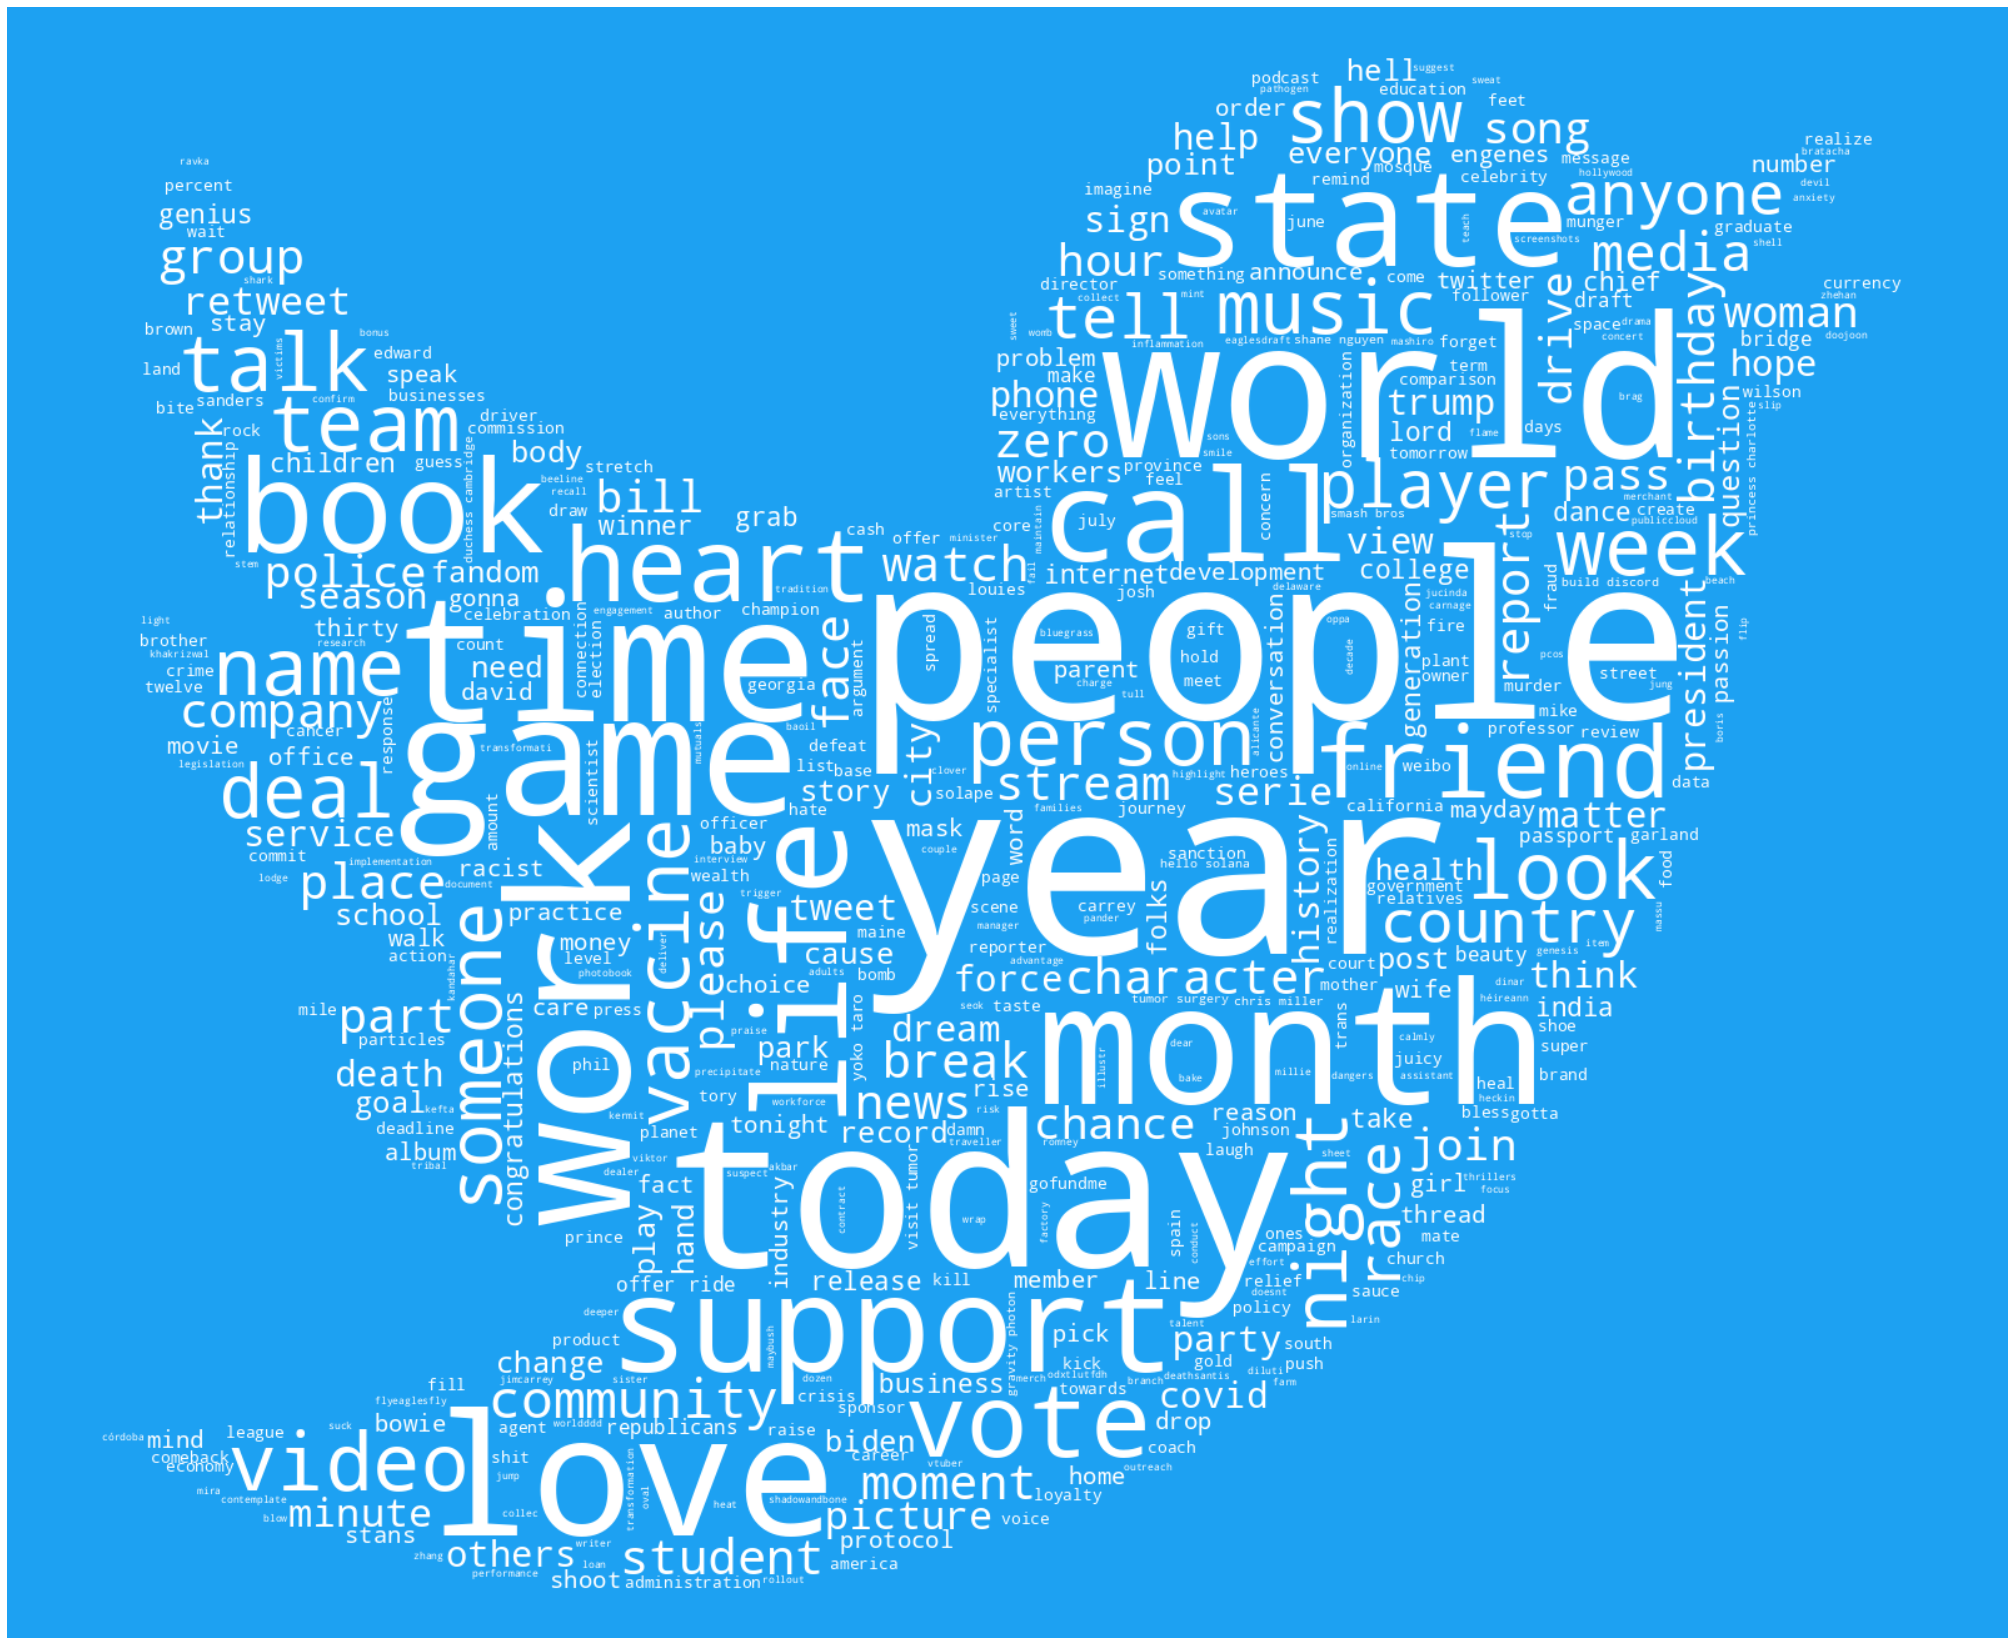

In [15]:
cloudtext1 = ' '.join(text1)

def white_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(100, 100)

#wordcloud = WordCloud().generate(text)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()
mask = np.array(Image.open(path.join(d, "Twitter-symbol.jpg")))
wordcloud1 = WordCloud(max_font_size=200, max_words=500, mask=mask, background_color=(0x1D,0xA1,0xF2)).generate(cloudtext1)




# Display the generated image:
#plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(figsize=(40,30))
plt.imshow(wordcloud1.recolor(color_func = white_color_func, random_state=3),
           interpolation="bilinear")
plt.axis("off")
#plt.show()

(-0.5, 899.5, 899.5, -0.5)

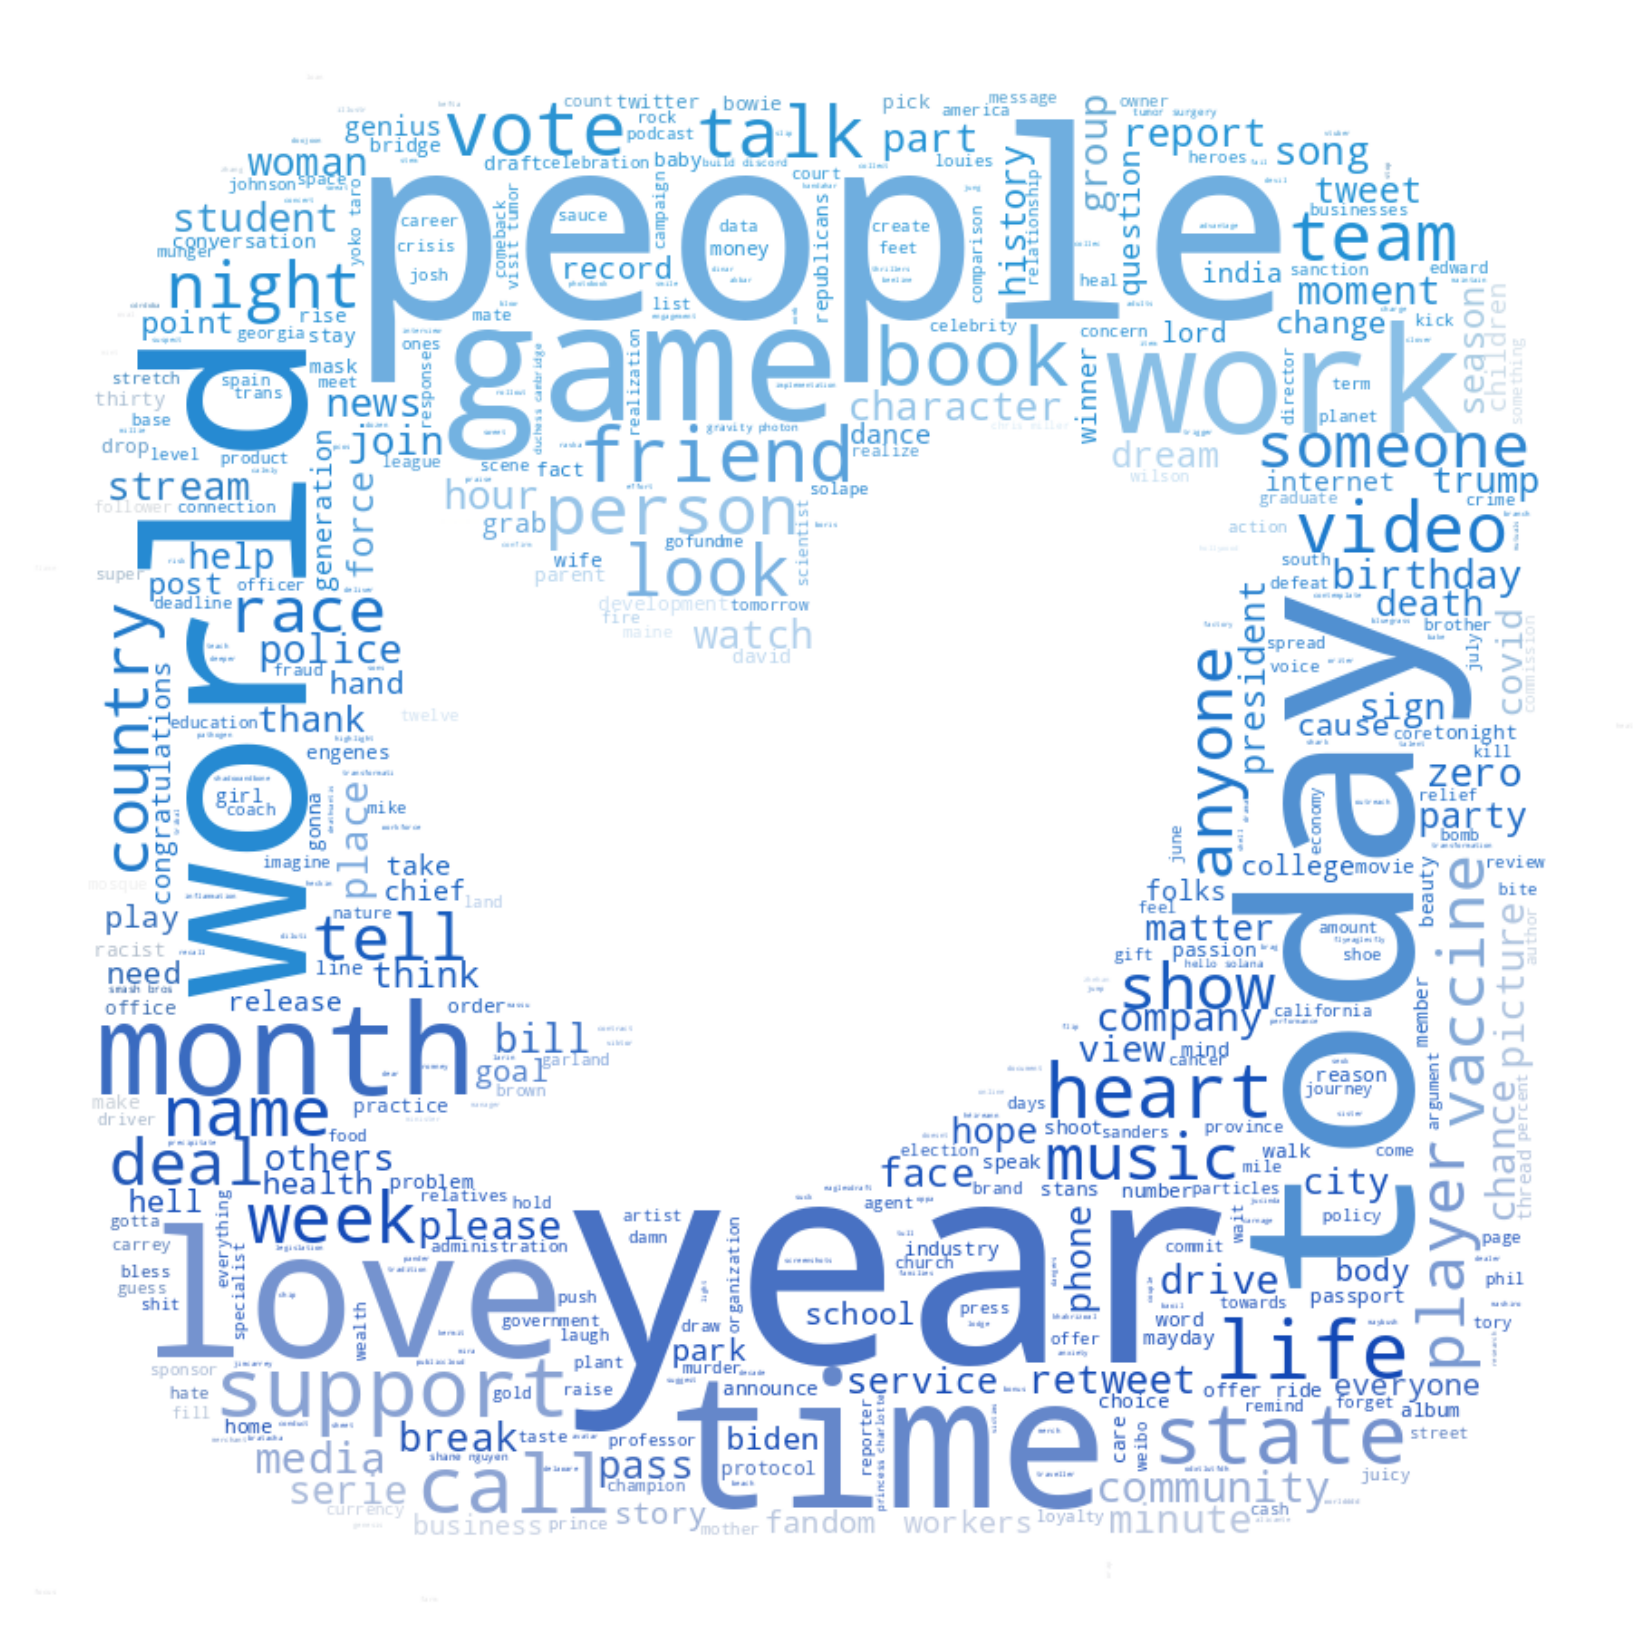

In [16]:
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

cloudtext1 = ' '.join(text1)

#colors = np.array(Image.open(path.join(d, "twitter-color.png")))
mask = np.array(Image.open(path.join(d, "twitter-color.jpeg")))

wc = WordCloud(max_words=500, mask=mask, 
               max_font_size=200, random_state=42, background_color="white")

# generate word cloud
wc.generate(cloudtext1)

# create coloring from image
image_colors = ImageColorGenerator(mask)

plt.figure(figsize=(40,30))
#plt.imshow(wordcloud1.recolor(color_func=mask, random_state=3),
#           interpolation="bilinear")
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")


In [17]:
def clean_doc(doc):
#split document into individual words
    tokens=[]
    for i in doc.split():
        
        if i[0] != '@':
        
            j = wnl.lemmatize(i, pos='v')
            tokens.append(j)
#    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
# remove punctuation from each word
#    tokens = [re_punc.sub('', w) for w in tokens]
# remove remaining tokens that are not alphabetic
    tokens = [word for word in tokens if word.isalpha()]
# filter out short tokens
    tokens = [word for word in tokens if len(word) > 3]
#lowercase all words
    tokens = [word.lower() for word in tokens]
# filter out stop words
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if not w in stop_words]
    tokens = [w for w in tokens if not w in ["the", "get", "say", "use", "may","like"\
                                                "also", "would", "could", "rt", "https",\
                                                "zkzkzkxk", "thing", "things"]]
    is_noun = lambda pos: pos[:2] == 'NN'
    tokens = [word for (word, pos) in nltk.pos_tag(tokens) if is_noun(pos)] 
    print(tokens)
# word stemming
# ps=PorterStemmer()
# tokens=[ps.stem(word) for word in tokens]
    return tokens

In [18]:
def One_Hot(variable):
    LE=LabelEncoder()
    LE.fit(variable)
    Label1=LE.transform(variable)
    OHE=OneHotEncoder()
    labels=OHE.fit_transform(Label1.reshape(-1,1)).toarray()
    return labels, LE, OHE

In [19]:
path = os.getcwd()

In [20]:
#create empty list to store screen_names
screen_names=[]
#for loop which appends the DSI title to the titles list
for i in range(0,len(df3)):
    temp_text=df3['screen_name'].iloc[i]
    screen_names.append(temp_text)

In [21]:
#create empty list to store tweets
tweets=[]
#for loop which appends the text to the text_body list
for i in range(0,len(df3)):
    temp_text=df3['text'].iloc[i]
    tweets.append(temp_text)
    

In [22]:
#empty list to store processed documents
processed_text=[]
#for loop to process the text to the processed_text list
for i in tweets:
    text=clean_doc(i)
    processed_text.append(text)

['victims']
['wrap']
['drama', 'genius', 'jung']
['zhang', 'character', 'moment', 'matter', 'character']
['years']
['viktor', 'dealer', 'merchant', 'dozen', 'shell']
['book', 'people', 'asian']
['families', 'plan']
['help', 'show', 'concert', 'photobook']
['years']
['massu', 'shoe']
['california', 'college', 'professor', 'student', 'call']
['birthday', 'sister', 'worldddd', 'mira', 'bless']
['yoko', 'taro', 'interview', 'kermit', 'vtuber', 'avatar', 'yoko', 'taro']
['india', 'crisis', 'trigger', 'carnage', 'precipitate', 'conduct']
['congratulations', 'product', 'agent', 'deal']
['collect', 'transformation', 'traveller', 'overdrive']
['party', 'someone', 'slip', 'crime', 'scene', 'suspect']
['minute', 'person', 'world', 'guess']
['group', 'students', 'release']
[]
['thrillers', 'series']
['night']
['tull', 'part']
['teach', 'love', 'others', 'lords', 'life', 'sons']
['implementation', 'call']
['government', 'vaccine', 'legislation']
['concern']
['jucinda', 'arden', 'boris', 'johnson']


['wheel', 'land', 'shoot']
['money', 'elevator', 'dance', 'horse', 'mmmkay']
['bacon']
['church', 'business', 'body']
['sell', 'dream', 'someone', 'mention']
['doesnt', 'increase', 'vote', 'maintain']
['beast', 'argument']
['india', 'surge', 'order', 'variety', 'food', 'products', 'rise', 'spot']
['secret', 'fear']
['trump', 'realization', 'biden', 'fraud']
['hold', 'food', 'service', 'feet', 'overhaul', 'idea']
['justice', 'league', 'realize', 'avengers', 'fish']
['depend', 'response']
['article', 'spark', 'pushback', 'money']
['check', 'loves']
['gift']
['speak', 'word']
['time', 'president', 'force', 'service', 'government']
['birthday', 'love', 'love', 'stay', 'toghter']
['gold', 'bestseller', 'kick', 'help']
['sure', 'sure']
['join', 'nigeria', 'beat', 'till']
['teams', 'stay']
['fams', 'shop', 'sell', 'container']
['showrunners', 'development', 'conversation']
['beauty', 'face', 'beauty', 'heart']
['provide', 'seamless', 'fundraise']
['mother', 'stand']
['selena', 'advocate', 'he

In [23]:
#stitch back together individual words to reform body of text
final_processed_text=[]
for i in processed_text:
    try:
        temp_DSI=i[0]
    except:
        pass
    for k in range(1,len(i)):
        temp_DSI=temp_DSI+' '+i[k]
    final_processed_text.append(temp_DSI)
    
print(final_processed_text)

['victims', 'wrap', 'drama genius jung', 'zhang character moment matter character', 'years', 'viktor dealer merchant dozen shell', 'book people asian', 'families plan', 'help show concert photobook', 'years', 'massu shoe', 'california college professor student call', 'birthday sister worldddd mira bless', 'yoko taro interview kermit vtuber avatar yoko taro', 'india crisis trigger carnage precipitate conduct', 'congratulations product agent deal', 'collect transformation traveller overdrive', 'party someone slip crime scene suspect', 'minute person world guess', 'group students release', 'group students release', 'thrillers series', 'night', 'tull part', 'teach love others lords life sons', 'implementation call', 'government vaccine legislation', 'concern', 'jucinda arden boris johnson', 'writer watch scene', 'writer watch scene', 'boris johnson minister', 'contract year sign bonus bless', 'someone', 'suck pcos inflammation kick', 'season bite ravka break grab kefta', 'talent face force

In [24]:
#note the ngram_range will allow you to include multiple words within the TFIDF matrix
#Call Tfidf Vectorizer
Tfidf=TfidfVectorizer(ngram_range=(1,4))
#fit the vectorizer using final processed documents.  The vectorizer requires the
#stiched back together document.
TFIDF_matrix=Tfidf.fit_transform(final_processed_text)
#creating dataframe from TFIDF Matrix
matrix=pd.DataFrame(TFIDF_matrix.toarray(), columns=Tfidf.get_feature_names(), index=screen_names)

matrix


abbasi  abbasi mosque  abbasi mosque mosque  \
lakota126         0.0            0.0                   0.0   
HoopFan29         0.0            0.0                   0.0   
Ongpai            0.0            0.0                   0.0   
Pladolly3         0.0            0.0                   0.0   
Lee_Adorned       0.0            0.0                   0.0   
...               ...            ...                   ...   
MartinSkold2      0.0            0.0                   0.0   
AkivaForman       0.0            0.0                   0.0   
whythedilEMMA     0.0            0.0                   0.0   
sayk_art          0.0            0.0                   0.0   
catherinjoyb      0.0            0.0                   0.0   

               abbasi mosque mosque city  absence  absence clothe  \
lakota126                            0.0      0.0             0.0   
HoopFan29                            0.0      0.0             0.0   
Ongpai                               0.0      0.0             0.0   
Pladolly3                            0.0      0.0             0.0   
Lee_Adorned                          0.0      0.0             0.0   
...                                  ...      ...             ...   
MartinSkold2                         0.0      0.0             0.0   
AkivaForman                          0.0      0.0             0.0   
whythedilEMMA                        0.0      0.0             0.0   
sayk_art                             0.0      0.0             0.0   
catherinjoyb                         0.0      0.0             0.0   

               absence clothe relationship  absentee  absentee ballot  \
lakota126                              0.0       0.0              0.0   
HoopFan29                              0.0       0.0              0.0   
Ongpai                                 0.0       0.0              0.0   
Pladolly3                              0.0       0.0              0.0   
Lee_Adorned                            0.0       0.0              0.0   
...                                    ...       ...              ...   
MartinSkold2                           0.0       0.0              0.0   
AkivaForman                            0.0       0.0              0.0   
whythedilEMMA                          0.0       0.0              0.0   
sayk_art                               0.0       0.0              0.0   
catherinjoyb                           0.0       0.0              0.0   

               absentee ballot deadline  ...  𝐦𝐚𝐜𝐡𝐢𝐧𝐞 charger strike batter  \
lakota126                           0.0  ...                            0.0   
HoopFan29                           0.0  ...                            0.0   
Ongpai                              0.0  ...                            0.0   
Pladolly3                           0.0  ...                            0.0   
Lee_Adorned                         0.0  ...                            0.0   
...                                 ...  ...                            ...   
MartinSkold2                        0.0  ...                            0.0   
AkivaForman                         0.0  ...                            0.0   
whythedilEMMA                       0.0  ...                            0.0   
sayk_art                            0.0  ...                            0.0   
catherinjoyb                        0.0  ...                            0.0   

               𝐬𝐭𝐫𝐢𝐤𝐞𝐨𝐮𝐭  𝐬𝐭𝐫𝐢𝐤𝐞𝐨𝐮𝐭 𝐦𝐚𝐜𝐡𝐢𝐧𝐞  𝐬𝐭𝐫𝐢𝐤𝐞𝐨𝐮𝐭 𝐦𝐚𝐜𝐡𝐢𝐧𝐞 charger  \
lakota126            0.0                0.0                        0.0   
HoopFan29            0.0                0.0                        0.0   
Ongpai               0.0                0.0                        0.0   
Pladolly3            0.0                0.0                        0.0   
Lee_Adorned          0.0                0.0                        0.0   
...                  ...                ...                        ...   
MartinSkold2         0.0                0.0                        0.0   
AkivaForman          0.

In [25]:
average_TFIDF={}
for i in matrix.columns:
    average_TFIDF[i]=np.mean(matrix[i])
average_TFIDF_DF=pd.DataFrame(average_TFIDF,index=[0]).transpose()
average_TFIDF_DF.columns=['TFIDF']
#calculate Q1 and Q3 range
Q1=np.percentile(average_TFIDF_DF, 25)
Q3=np.percentile(average_TFIDF_DF, 75)
IQR = Q3 - Q1
outlier=Q3+(1.5*IQR)

In [26]:
#words that exceed the Q3+IQR*1.5
outlier_list=average_TFIDF_DF[average_TFIDF_DF['TFIDF']>=outlier]
print(outlier_list)

                       TFIDF
album               0.001704
anyone              0.002000
argument            0.001555
baby                0.001943
bacon               0.002000
...                      ...
writer              0.001659
writer watch        0.001659
writer watch scene  0.001659
year                0.003871
years               0.009284

[252 rows x 1 columns]


In [27]:
documents = [TaggedDocument(doc, [i]) for i, doc in
enumerate(final_processed_text)]
model = Doc2Vec(documents, vector_size=100, window=2, min_count=1, workers=4)

In [28]:
for i in range(0,len(documents)):
    print(documents[i])

TaggedDocument(victims, [0])
TaggedDocument(wrap, [1])
TaggedDocument(drama genius jung, [2])
TaggedDocument(zhang character moment matter character, [3])
TaggedDocument(years, [4])
TaggedDocument(viktor dealer merchant dozen shell, [5])
TaggedDocument(book people asian, [6])
TaggedDocument(families plan, [7])
TaggedDocument(help show concert photobook, [8])
TaggedDocument(years, [9])
TaggedDocument(massu shoe, [10])
TaggedDocument(california college professor student call, [11])
TaggedDocument(birthday sister worldddd mira bless, [12])
TaggedDocument(yoko taro interview kermit vtuber avatar yoko taro, [13])
TaggedDocument(india crisis trigger carnage precipitate conduct, [14])
TaggedDocument(congratulations product agent deal, [15])
TaggedDocument(collect transformation traveller overdrive, [16])
TaggedDocument(party someone slip crime scene suspect, [17])
TaggedDocument(minute person world guess, [18])
TaggedDocument(group students release, [19])
TaggedDocument(group students release

In [29]:
doc2vec_df=pd.DataFrame()
for i in range(0,len(processed_text)):
    vector=pd.DataFrame(model.infer_vector(processed_text[i])).transpose()
    doc2vec_df=pd.concat([doc2vec_df,vector], axis=0)

In [30]:
doc2vec_df=doc2vec_df.reset_index()
doc_titles={'screen_names': screen_names}
t=pd.DataFrame(doc_titles)
doc2vec_df=pd.concat([doc2vec_df,t], axis=1)
doc2vec_df=doc2vec_df.drop('index', axis=1)

In [31]:
model.docvecs.similarity(0, 3)

<ipython-input-31-d6bc6a7753fa>:1: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  model.docvecs.similarity(0, 3)


0.8540746

In [32]:
similarity = []
tweet1 = []
tweet2 = []

for i in range (0, len(documents)):
    for j in range (0, len(documents)):
        x = model.docvecs.similarity(i, j)
        similarity.append(x)
        tweet1.append(i)
        tweet2.append(j)

sim_df = pd.DataFrame()
sim_df['similarity'] = similarity
sim_df['tweet1'] = tweet1
sim_df['tweet2'] = tweet2

sim_df.head

<ipython-input-32-1b19b02161dc>:7: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  x = model.docvecs.similarity(i, j)


<bound method NDFrame.head of         similarity  tweet1  tweet2
0         1.000000       0       0
1         0.817444       0       1
2         0.830112       0       2
3         0.854075       0       3
4         0.733441       0       4
...            ...     ...     ...
249995    0.684111     499     495
249996    0.653836     499     496
249997    0.444111     499     497
249998    0.775285     499     498
249999    1.000000     499     499

[250000 rows x 3 columns]>

In [33]:

pd.set_option("display.precision", 15)

sim_df_important = sim_df[sim_df.tweet1 != tweet2]

#sim_df_important.info()
#sim_df_important
sim_df_important = sim_df_important.sort_values(by='similarity', ascending=False)
sim_df_important



similarity  tweet1  tweet2
169645  0.999376714229584     339     145
72839   0.999376714229584     145     339
169145  0.988418579101562     338     145
72838   0.988418579101562     145     338
169838  0.988232493400574     339     338
...                   ...     ...     ...
38180  -0.782562553882599      76     180
90008  -0.790132880210876     180       8
4180   -0.790132880210876       8     180
215180 -0.792198419570923     430     180
90430  -0.792198419570923     180     430

[249500 rows x 3 columns]

In [34]:
#word to vec
model_w2v = Word2Vec(processed_text, window=5, min_count=1, workers=4)

In [35]:
#join all processed DSI words into single list
processed_text_w2v=[]
for i in processed_text:
    for k in i:
        processed_text_w2v.append(k)

In [36]:
#obtain all the unique words from DSI
w2v_words=list(set(processed_text_w2v))

In [37]:
#empty dictionary to store words with vectors
w2v_vectors={}

In [38]:
#for loop to obtain weights for each word
for i in w2v_words:
    temp_vec=model_w2v.wv[i]
    w2v_vectors[i]=temp_vec

In [39]:
#create a final dataframe to view word vectors
w2v_df=pd.DataFrame(w2v_vectors).transpose()

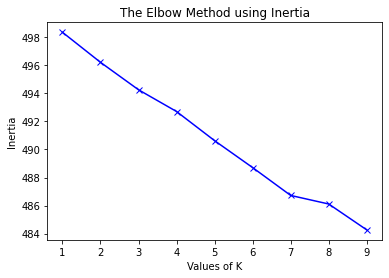

In [40]:
inertias = []
mapping = {}
K = range(1, 10)
 
for k in K:
    # Building and fitting the model
    km = KMeans(n_clusters=k)
    km.fit(TFIDF_matrix)
 
    inertias.append(km.inertia_)

    mapping[k] = km.inertia_

plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [41]:
k=6
km = KMeans(n_clusters=k, random_state =42)
km.fit(TFIDF_matrix)
clusters = km.labels_.tolist()
y_kmeans = km.predict(TFIDF_matrix)

In [42]:
terms = Tfidf.get_feature_names()
Dictionary={'ScreenNames':screen_names, 'Cluster':clusters,  'Text': final_processed_text}
frame=pd.DataFrame(Dictionary, columns=['Cluster', 'ScreenNames','Text'])
print("Top terms per cluster:")
#sort cluster centers by proximity to centroid
order_centroids = km.cluster_centers_.argsort()[:, ::-1] 

Top terms per cluster:


In [43]:
terms_dict=[]

In [44]:
#dictionary to store terms and titles
cluster_terms={}
cluster_title={}

In [45]:
for i in range(k):
    print("\nCluster %d:" % i),
    temp_terms=[] 
    temp_titles=[]
    for ind in order_centroids[i, :10]: 
        
        terms_dict.append(terms[ind])
        temp_terms.append(terms[ind])
        cluster_terms[i]=temp_terms 
        print("Cluster %d titles:" % i, end='')
        temp=frame[frame['Cluster']==i]
#        for title in temp['ScreenNames']: 
#            print(' %s,' % title, end='')
#            temp_titles.append(title)
        print(' %s' % terms[ind])
        cluster_title[i]=temp_titles


Cluster 0:
Cluster 0 titles: years
Cluster 0 titles: look
Cluster 0 titles: someone
Cluster 0 titles: think
Cluster 0 titles: call
Cluster 0 titles: winner
Cluster 0 titles: time
Cluster 0 titles: night
Cluster 0 titles: vote
Cluster 0 titles: today

Cluster 1:
Cluster 1 titles: health
Cluster 1 titles: care health
Cluster 1 titles: birthday btob yook
Cluster 1 titles: btob yook
Cluster 1 titles: yook care health
Cluster 1 titles: yook care
Cluster 1 titles: birthday btob
Cluster 1 titles: btob
Cluster 1 titles: birthday btob yook care
Cluster 1 titles: yook

Cluster 2:
Cluster 2 titles: love
Cluster 2 titles: heart love
Cluster 2 titles: love think
Cluster 2 titles: place heart love think
Cluster 2 titles: place heart love
Cluster 2 titles: heart love think
Cluster 2 titles: place heart
Cluster 2 titles: hyung
Cluster 2 titles: hyung love
Cluster 2 titles: think

Cluster 3:
Cluster 3 titles: work
Cluster 3 titles: life
Cluster 3 titles: parent
Cluster 3 titles: service
Cluster 3 titl

#Equivalence Classes of clusters
Cluster 0: Sports
Cluster 1: Music
Cluster 2: News
Cluster 3: Health
Cluster 4: Politics
Cluster 5: Politics


Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters
Fit 12 clusters
Fit 14 clusters
Fit 16 clusters
Fit 18 clusters
Fit 20 clusters


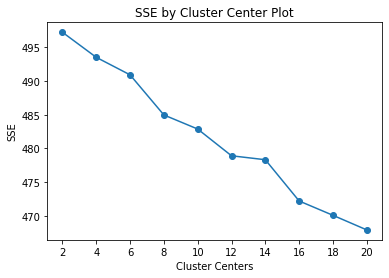

In [46]:
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 2)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    
find_optimal_clusters(TFIDF_matrix, 20)


In [47]:
clusters = MiniBatchKMeans(n_clusters=10, init_size=1024, batch_size=2048, random_state=20).fit_predict(TFIDF_matrix)
clusters

array([6, 6, 6, 6, 1, 6, 5, 6, 6, 1, 6, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 9, 6, 6, 6, 4, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 2, 6, 3, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 9, 6, 6, 6, 6, 6, 6, 1, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6,
       6, 6, 2, 6, 6, 6, 6, 6, 6, 6, 6, 6, 8, 6, 6, 6, 6, 6, 6, 6, 5, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 1, 6, 6, 6, 6, 6,
       5, 6, 6, 6, 6, 6, 6, 6, 1, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 6,
       6, 6, 0, 6, 2, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 3, 6, 6, 6, 5, 6, 2, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5,
       6, 6, 6, 7, 7, 6, 6, 6, 6, 6, 5, 6, 6, 2, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 8, 8, 8, 6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 1, 6, 6, 6, 6, 6, 6, 6, 6, 6,

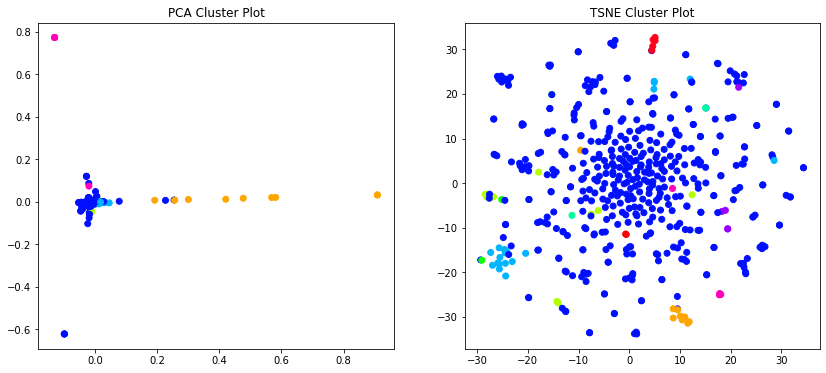

In [48]:
def plot_tsne_pca(data, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=500, replace=False)
    
    pca = PCA(n_components=2).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(data[max_items,:].todense()))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=500, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')
    
plot_tsne_pca(TFIDF_matrix, clusters)

In [49]:
hash3 = df3['first_hashtag'].dropna()
hash3 = hash3.tolist()
hash3

['EaglesDraft',
 'Highlight',
 'Delaware',
 'ShadowandBone',
 'publiccloud',
 'JimCarrey',
 'AFG',
 'MayBush',
 'anitwt',
 'NFLDraft',
 'Cubs',
 'BiafraNationNow',
 'PhenomenalBlackWidow',
 'jim',
 'teslamodel3',
 'ShamelessSelfpromoSaturday',
 'Louies',
 'publichealth',
 'KentuckyDerby',
 'Bills',
 'GRAVITY',
 'EndSARS',
 '몬스타엑스',
 'WritingCommunity',
 'Mexico',
 'SouthernFire',
 'ExitModi',
 'AstralAscent',
 'Queensland',
 'MayDay',
 'AidinDying',
 'Auschwitz',
 'Investing',
 'ElectionDay',
 'MayDay',
 'dogecoin',
 'BTSARMY',
 'MayDay',
 'کرپٹ_کو_کیوں_چھوڑ_دیا',
 'GRAVITY',
 'NCT2020',
 'Louies',
 'SherlockHolmes',
 'DidYouknow',
 'Browns',
 '49ers',
 'Louisville',
 'parking',
 'gunpla',
 'AAPIHeritageMonth',
 'Mangli',
 'launchpad',
 'InBryanWeRust',
 'OneCru',
 'SB19',
 'SouthAfrica']

In [50]:
fdist3 = nltk.FreqDist(hash3)
print (fdist3.most_common(100))

[('MayDay', 3), ('Louies', 2), ('GRAVITY', 2), ('EaglesDraft', 1), ('Highlight', 1), ('Delaware', 1), ('ShadowandBone', 1), ('publiccloud', 1), ('JimCarrey', 1), ('AFG', 1), ('MayBush', 1), ('anitwt', 1), ('NFLDraft', 1), ('Cubs', 1), ('BiafraNationNow', 1), ('PhenomenalBlackWidow', 1), ('jim', 1), ('teslamodel3', 1), ('ShamelessSelfpromoSaturday', 1), ('publichealth', 1), ('KentuckyDerby', 1), ('Bills', 1), ('EndSARS', 1), ('몬스타엑스', 1), ('WritingCommunity', 1), ('Mexico', 1), ('SouthernFire', 1), ('ExitModi', 1), ('AstralAscent', 1), ('Queensland', 1), ('AidinDying', 1), ('Auschwitz', 1), ('Investing', 1), ('ElectionDay', 1), ('dogecoin', 1), ('BTSARMY', 1), ('کرپٹ_کو_کیوں_چھوڑ_دیا', 1), ('NCT2020', 1), ('SherlockHolmes', 1), ('DidYouknow', 1), ('Browns', 1), ('49ers', 1), ('Louisville', 1), ('parking', 1), ('gunpla', 1), ('AAPIHeritageMonth', 1), ('Mangli', 1), ('launchpad', 1), ('InBryanWeRust', 1), ('OneCru', 1), ('SB19', 1), ('SouthAfrica', 1)]


In [51]:
hash_df3 = df3[['text','first_hashtag']]
hash_df3

text  \
0                                                                       @mider_teacup I bet he has more victims too, this man is a danger to the public   
1                                          RT @Eagles: That’s a wrap on the 2021 #EaglesDraft!\n\n@LifeBrand_AI | #FlyEaglesFly https://t.co/Nxzpk5TVb5   
2           RT @KoreanUpdates: Around US confirms #Highlight #Doojoon will be leading new drama 'No Goo Pil Soo' as a genius in his 20s, Jung Seok. He…   
3        RT @sacred_ribbon: Every single Zhang Zhehan’s character always have one big gay moment no matter how straight the character should be..\n\nE…   
4          @serene4uk @ellufc @JimenaJuani But isn’t it great just to have a top 3 after nearly as many years of Bielsa in cha… https://t.co/mEOnOgINwT   
..                                                                                                                                                  ...   
495        @justindeanlee There are quite a lot of people over the years for whom this agency obviously did not literally mean… https://t.co/WjaIb0Mce2   
496  RT @DeadPresPicks: VIP 1/1 \n\nMLB ⚾️⚾️\n\nWhite Sox -1 -126 (1u) \n\nDrop a like if ur ridin the hot hand LFG NEED YALL W ME LFG🔥⤵️ https://t.co…   
497        at my first soccer game since before the pandemic and i’m seated in front of a group of guys who are objectifying t… https://t.co/996gSVXqfo   
498        RT @thecaravanindia: Archives | The evasion in taking a political position, or expressing any individual conviction, signals how actors are…   
499         RT @sunsandships: TIL the oldest living terrestrial animal in the world is a 🐢 named Jonathan who has a mate named Frederik that he’s been…   

    first_hashtag  
0             NaN  
1     EaglesDraft  
2       Highlight  
3             NaN  
4             NaN  
..            ...  
495           NaN  
496           NaN  
497           NaN  
498           NaN  
499           NaN  

[500 rows x 2 columns]

In [52]:
hash_df3 = hash_df3.dropna().reset_index()
hash_df3 = hash_df3[['text','first_hashtag']]
hash_df3

text  \
0                                          RT @Eagles: That’s a wrap on the 2021 #EaglesDraft!\n\n@LifeBrand_AI | #FlyEaglesFly https://t.co/Nxzpk5TVb5   
1           RT @KoreanUpdates: Around US confirms #Highlight #Doojoon will be leading new drama 'No Goo Pil Soo' as a genius in his 20s, Jung Seok. He…   
2        RT @pqpolitics: Viktor Bout, a Russian arms dealer once known as “the merchant of death,” had nearly a dozen #Delaware shell companies.\n\nTi…   
3         RT @ABiteOfPod: Next season on A Bite Of we will be going to Ravka and breaking down Netflix’s #ShadowandBone! \nGrab your Kefta and go into…   
4          These days, every business is making a beeline for the #publiccloud. Dig deeper to know the risks that come with th… https://t.co/QJ3clZWKjY   
5                            "The performance is love, It's a dance for me." - Jim Carrey, The Hollywood Reporter\n\n#JimCarrey https://t.co/nM1hKn31zt   
6           RT @bsarwary: #AFG Ezatullah son of the murdered tribal chief Akbar Khakrizwal was assassinated in Kandahar city in PD9 last night. In PD3…   
7       RT @newrossstreetf1: TRADITION MAINTAINED \n\nA vibrant #MayBush adorns the Bearna Baoil today beneath bratacha na hÉireann agus Laighean.\nCo…   
8    RT @Jitters_Box: alright fine fine ill do the list for mutuals- #anitwt\n\nLike/Rt if you watch:\n-ohshc\n-jjk\n-sk8 \n-black clover\n-mashiro no…   
9            RT @SportsCenter: A very good assistant GM 🐶\n\nBill Belichick's dog was back for the #NFLDraft\n\n(via @Patriots) https://t.co/ODxtlUtfDH   
10            May 1, 1958\n#Cubs, Johnny Goryl hits a one-out ninth inning walk-off home run as Cubs defeat the Milwaukee Braves at Wrigley Field, 3-2.   
11         RT @EmekaGift: Wow!, #BiafraNationNow is trending, keep pushing comrades, We shall make history tonight, we are talking to the world.  #Bia…   
12         Lady @TheAJMendez - The #PhenomenalBlackWidow is that #Phenomenal @WWE Woman #Superstar who everyone looks up to be… https://t.co/1vV45cxvLM   
13                          When you pose for a memory but you look like THE MASK #jim #carrey #chola #fridays @ Socorro, Texas https://t.co/zOSjDMjLOh   
14         I have a #teslamodel3 Not bc I think it’s good for the environment. It’s a great performing car and very convenient… https://t.co/jmrfYQPuMm   
15       RT @Kyle_T_Davis: It just turned 12:05am for me so lets do the first #ShamelessSelfpromoSaturday of the day!\n\nWho is up for a pinned retwee…   
16                                                                                 you're a legend I vote #Louies for #BestFanArmy at the #iHeartAwards   
17             When was the last time you saw jazz hands in a public health video? 👐  #publichealth #covid19vaccination #besafe https://t.co/zPTdhRLoC9   
18       RT @tedcruz: A beautiful day with Heidi at the #KentuckyDerby\n\nIn 2017, Caroline (then age 9) had us put $2 on Always Dreaming, and she won…   
19         RT @JoeBuscaglia: From the way #Bills GM Brandon Beane just spoke about DE Mario Addison, he is VERY much in the plans for 2021 as both a p…   
20     RT @ProfRobStew: DARK MATTER ISN'T *PARTICLES.*\n\nIt's merely an ALTERED STATE of #GRAVITY. 😉🙏\n\n"To make a measurement of THE PHOTON once wi…   
21         RT @SerahUndaunted: During #EndSARS Lekki Protest,there was a guy who always came to me for brooms to join d cleaning,he would always reque…   
22       I made this Kihyun drawing because i’m really excited with the new comeback 🐹❤️\n\n@OfficialMonstaX\n#몬스타엑스\n#MONSTAX… https://t.co/Gpl60do8AG   
23         Hey Everyone!!! Rachel Wilson @RachelW88093475 is a new member of the #WritingCommunity!!! She needs 30 follower fr… https://t.co/6lOssCk5gB   
24  RT @AJaulas: #Mexico\nLouis Aragón: “How long it is,to die for a lifetime!”\nEly just breathes &amp; eats, Is that living?\nWould those who hold E…   
25         RT @BFeatherSD: Per @CALFIRESANDIEGO: #SouthernFire is 40 Acres, with a critical Rate of Spread. Burning t

In [53]:
hash_df3['label'] = hash_df3['first_hashtag'].factorize()[0]
hash_df3

text  \
0                                          RT @Eagles: That’s a wrap on the 2021 #EaglesDraft!\n\n@LifeBrand_AI | #FlyEaglesFly https://t.co/Nxzpk5TVb5   
1           RT @KoreanUpdates: Around US confirms #Highlight #Doojoon will be leading new drama 'No Goo Pil Soo' as a genius in his 20s, Jung Seok. He…   
2        RT @pqpolitics: Viktor Bout, a Russian arms dealer once known as “the merchant of death,” had nearly a dozen #Delaware shell companies.\n\nTi…   
3         RT @ABiteOfPod: Next season on A Bite Of we will be going to Ravka and breaking down Netflix’s #ShadowandBone! \nGrab your Kefta and go into…   
4          These days, every business is making a beeline for the #publiccloud. Dig deeper to know the risks that come with th… https://t.co/QJ3clZWKjY   
5                            "The performance is love, It's a dance for me." - Jim Carrey, The Hollywood Reporter\n\n#JimCarrey https://t.co/nM1hKn31zt   
6           RT @bsarwary: #AFG Ezatullah son of the murdered tribal chief Akbar Khakrizwal was assassinated in Kandahar city in PD9 last night. In PD3…   
7       RT @newrossstreetf1: TRADITION MAINTAINED \n\nA vibrant #MayBush adorns the Bearna Baoil today beneath bratacha na hÉireann agus Laighean.\nCo…   
8    RT @Jitters_Box: alright fine fine ill do the list for mutuals- #anitwt\n\nLike/Rt if you watch:\n-ohshc\n-jjk\n-sk8 \n-black clover\n-mashiro no…   
9            RT @SportsCenter: A very good assistant GM 🐶\n\nBill Belichick's dog was back for the #NFLDraft\n\n(via @Patriots) https://t.co/ODxtlUtfDH   
10            May 1, 1958\n#Cubs, Johnny Goryl hits a one-out ninth inning walk-off home run as Cubs defeat the Milwaukee Braves at Wrigley Field, 3-2.   
11         RT @EmekaGift: Wow!, #BiafraNationNow is trending, keep pushing comrades, We shall make history tonight, we are talking to the world.  #Bia…   
12         Lady @TheAJMendez - The #PhenomenalBlackWidow is that #Phenomenal @WWE Woman #Superstar who everyone looks up to be… https://t.co/1vV45cxvLM   
13                          When you pose for a memory but you look like THE MASK #jim #carrey #chola #fridays @ Socorro, Texas https://t.co/zOSjDMjLOh   
14         I have a #teslamodel3 Not bc I think it’s good for the environment. It’s a great performing car and very convenient… https://t.co/jmrfYQPuMm   
15       RT @Kyle_T_Davis: It just turned 12:05am for me so lets do the first #ShamelessSelfpromoSaturday of the day!\n\nWho is up for a pinned retwee…   
16                                                                                 you're a legend I vote #Louies for #BestFanArmy at the #iHeartAwards   
17             When was the last time you saw jazz hands in a public health video? 👐  #publichealth #covid19vaccination #besafe https://t.co/zPTdhRLoC9   
18       RT @tedcruz: A beautiful day with Heidi at the #KentuckyDerby\n\nIn 2017, Caroline (then age 9) had us put $2 on Always Dreaming, and she won…   
19         RT @JoeBuscaglia: From the way #Bills GM Brandon Beane just spoke about DE Mario Addison, he is VERY much in the plans for 2021 as both a p…   
20     RT @ProfRobStew: DARK MATTER ISN'T *PARTICLES.*\n\nIt's merely an ALTERED STATE of #GRAVITY. 😉🙏\n\n"To make a measurement of THE PHOTON once wi…   
21         RT @SerahUndaunted: During #EndSARS Lekki Protest,there was a guy who always came to me for brooms to join d cleaning,he would always reque…   
22       I made this Kihyun drawing because i’m really excited with the new comeback 🐹❤️\n\n@OfficialMonstaX\n#몬스타엑스\n#MONSTAX… https://t.co/Gpl60do8AG   
23         Hey Everyone!!! Rachel Wilson @RachelW88093475 is a new member of the #WritingCommunity!!! She needs 30 follower fr… https://t.co/6lOssCk5gB   
24  RT @AJaulas: #Mexico\nLouis Aragón: “How long it is,to die for a lifetime!”\nEly just breathes &amp; eats, Is that living?\nWould those who hold E…   
25         RT @BFeatherSD: Per @CALFIRESANDIEGO: #SouthernFire is 40 Acres, with a critical Rate of Spread. Burning t

In [54]:
transformer_df3 = hash_df3[['text','label']]
transformer_df3

text  \
0                                          RT @Eagles: That’s a wrap on the 2021 #EaglesDraft!\n\n@LifeBrand_AI | #FlyEaglesFly https://t.co/Nxzpk5TVb5   
1           RT @KoreanUpdates: Around US confirms #Highlight #Doojoon will be leading new drama 'No Goo Pil Soo' as a genius in his 20s, Jung Seok. He…   
2        RT @pqpolitics: Viktor Bout, a Russian arms dealer once known as “the merchant of death,” had nearly a dozen #Delaware shell companies.\n\nTi…   
3         RT @ABiteOfPod: Next season on A Bite Of we will be going to Ravka and breaking down Netflix’s #ShadowandBone! \nGrab your Kefta and go into…   
4          These days, every business is making a beeline for the #publiccloud. Dig deeper to know the risks that come with th… https://t.co/QJ3clZWKjY   
5                            "The performance is love, It's a dance for me." - Jim Carrey, The Hollywood Reporter\n\n#JimCarrey https://t.co/nM1hKn31zt   
6           RT @bsarwary: #AFG Ezatullah son of the murdered tribal chief Akbar Khakrizwal was assassinated in Kandahar city in PD9 last night. In PD3…   
7       RT @newrossstreetf1: TRADITION MAINTAINED \n\nA vibrant #MayBush adorns the Bearna Baoil today beneath bratacha na hÉireann agus Laighean.\nCo…   
8    RT @Jitters_Box: alright fine fine ill do the list for mutuals- #anitwt\n\nLike/Rt if you watch:\n-ohshc\n-jjk\n-sk8 \n-black clover\n-mashiro no…   
9            RT @SportsCenter: A very good assistant GM 🐶\n\nBill Belichick's dog was back for the #NFLDraft\n\n(via @Patriots) https://t.co/ODxtlUtfDH   
10            May 1, 1958\n#Cubs, Johnny Goryl hits a one-out ninth inning walk-off home run as Cubs defeat the Milwaukee Braves at Wrigley Field, 3-2.   
11         RT @EmekaGift: Wow!, #BiafraNationNow is trending, keep pushing comrades, We shall make history tonight, we are talking to the world.  #Bia…   
12         Lady @TheAJMendez - The #PhenomenalBlackWidow is that #Phenomenal @WWE Woman #Superstar who everyone looks up to be… https://t.co/1vV45cxvLM   
13                          When you pose for a memory but you look like THE MASK #jim #carrey #chola #fridays @ Socorro, Texas https://t.co/zOSjDMjLOh   
14         I have a #teslamodel3 Not bc I think it’s good for the environment. It’s a great performing car and very convenient… https://t.co/jmrfYQPuMm   
15       RT @Kyle_T_Davis: It just turned 12:05am for me so lets do the first #ShamelessSelfpromoSaturday of the day!\n\nWho is up for a pinned retwee…   
16                                                                                 you're a legend I vote #Louies for #BestFanArmy at the #iHeartAwards   
17             When was the last time you saw jazz hands in a public health video? 👐  #publichealth #covid19vaccination #besafe https://t.co/zPTdhRLoC9   
18       RT @tedcruz: A beautiful day with Heidi at the #KentuckyDerby\n\nIn 2017, Caroline (then age 9) had us put $2 on Always Dreaming, and she won…   
19         RT @JoeBuscaglia: From the way #Bills GM Brandon Beane just spoke about DE Mario Addison, he is VERY much in the plans for 2021 as both a p…   
20     RT @ProfRobStew: DARK MATTER ISN'T *PARTICLES.*\n\nIt's merely an ALTERED STATE of #GRAVITY. 😉🙏\n\n"To make a measurement of THE PHOTON once wi…   
21         RT @SerahUndaunted: During #EndSARS Lekki Protest,there was a guy who always came to me for brooms to join d cleaning,he would always reque…   
22       I made this Kihyun drawing because i’m really excited with the new comeback 🐹❤️\n\n@OfficialMonstaX\n#몬스타엑스\n#MONSTAX… https://t.co/Gpl60do8AG   
23         Hey Everyone!!! Rachel Wilson @RachelW88093475 is a new member of the #WritingCommunity!!! She needs 30 follower fr… https://t.co/6lOssCk5gB   
24  RT @AJaulas: #Mexico\nLouis Aragón: “How long it is,to die for a lifetime!”\nEly just breathes &amp; eats, Is that living?\nWould those who hold E…   
25         RT @BFeatherSD: Per @CALFIRESANDIEGO: #SouthernFire is 40 Acres, with a critical Rate of Spread. Burning t

In [55]:
rows = transformer_df3.shape[0]
classes = len(transformer_df3.label.unique())

split_point = ((rows//10)*8)

df_train = transformer_df3[0:split_point]

df_test = transformer_df3[split_point:rows]

In [56]:
from transformers import LongformerTokenizerFast, LongformerForSequenceClassification, Trainer, TrainingArguments, LongformerConfig
import transformers
from simpletransformers.classification import ClassificationModel
import torch

In [57]:
transformer_model = ClassificationModel('roberta', 'roberta-base', \
                      num_labels=classes, \
                      #weight=[
                      #        1, 1, 1, 1, 1, 1, 1, 1, 1 , 1,
                      #        1, 1, 1, 1, 1, 1, 1, 1, 1 , 1,
                      #        1, 1, 1, 1, 1, 1, 1, 1, 1 , 1,
                      #        1, 1, 1, 1, 1, 1, 1, 1, 1 , 1,
                      #        1, 1, 1, 1, 1, 1, 1, 1, 1 , 1,
                      #        1, 1, 1, 1, 1, 1, 1, 1, 1 , 1,
                      #        1, 1, 1, 1, 1, 10, 1, 1,
                      #        ], \
                        use_cuda=False, \
                        args={ \
                          'output_dir': 'drive/MyDrive/model_output_2.5e-5_LR_seq1024/', \
                          'overwrite_output_dir': True, \
                        #   'fp16': True,\
                          'num_train_epochs': 3, \
                          'learning_rate': 2.5e-5, \
                          'max_seq_length': 1024})

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.bias', 'lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.out

In [ ]:
result = transformer_model.train_model(df_train, eval_df=df_test, verbose=True)

/Users/christinamarie/opt/anaconda3/lib/python3.8/site-packages/simpletransformers/classification/classification_model.py:448: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


In [ ]:
transformer_model.save_model()

In [ ]:
predictions, raw_outputs = transformer_model.predict(["""
cars cars cars
"""])
print(predictions)


In [ ]:
hash_df3['first_hashtag'].loc[hash_df3['label'] == predictions[0]].iloc[0]

In [ ]:
a = df3['text']
x = a.astype(str).tolist()
#print(x)

predictions, raw_outputs = transformer_model.predict(x)
print(predictions)